Probabilidade de pelo menos 3 falhas em uma semana: 0.5760


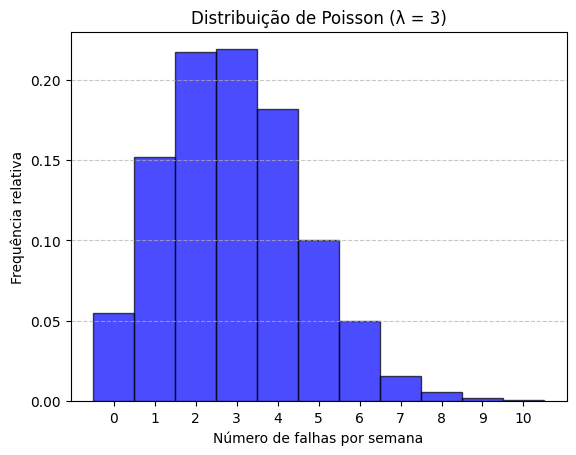

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
lambda1 = 3  # Média de falhas por semana
N = 1000  # Número de amostras

# Lista para armazenar os valores gerados
av = np.array([])

# Gerar N valores aleatórios uniformemente distribuídos entre 0 e 1
x = np.random.uniform(0, 1, N)

# Aplicar o método da Transformada Inversa para gerar valores Poisson
for ix in x:
    i = 0  # Contador de falhas
    pr = np.exp(-lambda1)  # Primeiro termo da distribuição de Poisson
    F = pr  # Inicializa a soma acumulativa da CDF

    # Encontrar o menor i tal que F >= U (inversão da CDF)
    while ix >= F:
        pr = lambda1 / (i + 1) * pr  # Atualiza a probabilidade do próximo valor de i
        F = F + pr  # Atualiza a soma acumulada da CDF
        i = i + 1  # Incrementa o número de falhas

    av = np.append(av, i)  # Armazena o número de falhas gerado

# Calcular P(X >= 3) = 1 - P(X <= 2)
prob_X_geq_3 = np.sum(av >= 3) / N

# Imprimir resultado da probabilidade
print(f"Probabilidade de pelo menos 3 falhas em uma semana: {prob_X_geq_3:.4f}")

# Graficar histograma
plt.hist(av, bins=np.arange(0, max(av.astype(int)) + 2) - 0.5, density=True, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Número de falhas por semana")
plt.ylabel("Frequência relativa")
plt.title("Distribuição de Poisson (λ = 3)")
plt.xticks(range(0, int(max(av)) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
